In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

## Reading in DataFrames from Files

Pandas has a number of very useful file reading tools. You can see them enumerated by typing "pd.re" and pressing tab. We'll be using read_csv today. 

In [174]:
data= pd.read_csv("enrollment.csv")

In [4]:
data.head(20)

,District,Location,School Type,Category,Composition,Number,Population,No/100000
0,Badin,Urban,Primary,INSTITUTIONS,TOTAL,168,"1,804,516",9.309976
1,Badin,Urban,Primary,INSTITUTIONS,MALE,30,"1,804,516",1.662496
2,Badin,Urban,Primary,INSTITUTIONS,FEMALE,27,"1,804,516",1.496246
3,Badin,Urban,Primary,INSTITUTIONS,MIXED,111,"1,804,516",6.151234
4,Badin,Urban,Primary,ENROLMENT,TOTAL,16446,"1,804,516",911.380115
5,Badin,Urban,Primary,ENROLMENT,MALE,10015,"1,804,516",554.996464
6,Badin,Urban,Primary,ENROLMENT,FEMALE,6431,"1,804,516",356.383651
7,Badin,Urban,Primary,TEACHING STAFF,TOTAL,550,"1,804,516",30.479087
8,Badin,Urban,Primary,TEACHING STAFF,MALE,382,"1,804,516",21.169111
9,Badin,Urban,Primary,TEACHING STAFF,FEMALE,168,"1,804,516",9.309976


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     3480 non-null   object 
 1   Location     3480 non-null   object 
 2   School Type  3480 non-null   object 
 3   Category     3480 non-null   object 
 4   Composition  3480 non-null   object 
 5   Number       3480 non-null   int64  
 6   Population   3480 non-null   object 
 7   No/100000    3480 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 217.6+ KB


In [9]:
data['District'].unique()

array(['Badin', 'Dadu', 'Hyderabad', 'Thatta', 'Jamshoro', 'Matira',
       'Tando Allah yar', 'Tando Muhammad Khan', 'Sujawal',
       'Central Karachi', 'East Karachi', 'South Karachi', 'West Karchi',
       'Malir Karachi', 'Korangi Karachi', 'Jacobad', 'Larkana',
       'Shikarpur', 'Kashmore', 'Kamber Shahdadkot', 'Khairpur Mirs',
       'Sukkhur', 'Ghotki', 'Mirpurkhaas', 'Tharparkar', 'Umerkot',
       'Sanghar', 'Naushero Feroz', 'Shaheed Benazirabad'], dtype=object)

In [100]:
data['Location'].unique()

#dropping totals:

data = data.drop(data[data['Location'] == 'Total'].index)

In [101]:
data['Location'].unique()

array(['Urban', 'Rural'], dtype=object)

In [102]:
print(data['School Type'].unique())
print(data['Category'].unique())
print(data['Composition'].unique())

#dropping totals:

data = data.drop(data[data['Category'] == 'INSTITUTIONS'].index)
data = data.drop(data[data['Category'] == 'ENROLMENT'].index)

data = data.drop(data[data['Composition'] == 'TOTAL'].index)

print(data['School Type'].unique())
print(data['Category'].unique())
print(data['Composition'].unique())

['Primary' 'Middle' 'Secondary' 'Higher secondary']
['INSTITUTIONS' 'ENROLMENT' 'TEACHING STAFF']
['TOTAL' 'MALE' 'FEMALE' 'MIXED']
['Primary' 'Middle' 'Secondary' 'Higher secondary']
['TEACHING STAFF']
['MALE' 'FEMALE']


In [22]:
data.head()

,District,Location,School Type,Category,Composition,Number,Population,No/100000
8,Badin,Urban,Primary,TEACHING STAFF,MALE,382,"1,804,516",21.169111
9,Badin,Urban,Primary,TEACHING STAFF,FEMALE,168,"1,804,516",9.309976
18,Badin,Urban,Middle,TEACHING STAFF,MALE,42,"1,804,516",2.327494
19,Badin,Urban,Middle,TEACHING STAFF,FEMALE,5,"1,804,516",0.277083
28,Badin,Urban,Secondary,TEACHING STAFF,MALE,224,"1,804,516",12.413301


In [103]:
data['Population'] = pd.to_numeric(data['Population'].str.replace(',', ''), errors='coerce').fillna(0)

# convert to integers
data['Population'] = data['Population'].astype(int)

In [104]:
data.loc[data['Composition'] == 'FEMALE', 'Composition'] = 'Female Teaching Staff'

In [105]:
data.loc[data['Composition'] == 'MALE', 'Composition'] = 'Male Teaching Staff'

#### Group by

In [106]:
res= data.groupby(["District", "Location","Category", "School Type","Composition"])
final= res.sum()
final


Number  \
District    Location Category       School Type      Composition                     
Badin       Rural    TEACHING STAFF Higher secondary Female Teaching Staff       3   
                                                     Male Teaching Staff        54   
                                    Middle           Female Teaching Staff      90   
                                                     Male Teaching Staff       245   
                                    Primary          Female Teaching Staff     509   
...                                                                            ...   
West Karchi Urban    TEACHING STAFF Middle           Male Teaching Staff       139   
                                    Primary          Female Teaching Staff     848   
                                                     Male Teaching Staff       671   
                                    Secondary        Female Teaching Staff     725   
                                                     Male Teaching Staff       405   

                                                                            Population  \
District    Location Category       School Type      Composition                         
Badin       Rural    TEACHING STAFF Higher secondary Female Teaching Staff     1804516   
                                                     Male Teaching Staff       1804516   
                                    Middle           Female Teaching Staff     1804516   
                                                     Male Teaching Staff       1804516   
                                    Primary          Female Teaching Staff     1804516   
...                                                                                ...   
West Karchi Urban    TEACHING STAFF Middle           Male Teaching Staff       3914757   
                                    Primary          Female Teaching Staff     3914757   
                                                     Male Teaching Staff       3914757   
                                    Secondary        Female Teaching Staff     3914757   
                                                     Male Teaching Staff       3914757   

                                                                            No/100000  
District    Location Category       School Type      Composition                       
Badin       Rural    TEACHING STAFF Higher secondary Female Teaching Staff   0.166250  
                                                     Male Teaching Staff     2.992492  
                                    Middle           Female Teaching Staff   4.987487  
                                                     Male Teaching Staff    13.577048  
                                    Primary          Female Teaching Staff  28.207010  
...                                                                               ...  
West Karchi Urban    TEACHING STAFF Middle           Male Teaching Staff     3.550667  
                                    Primary          Female Teaching Staff  21.661625  
                                                     Male Teaching Staff    17.140272  
                                    Secondary        Female Teaching Staff  18.519668  
                                                     Male Teaching Staff    10.345470  

[464 rows x 3 columns]

In [107]:
pivot = pd.pivot_table(final, values='No/100000', index='District', columns=['Composition', 'School Type', 'Location'], aggfunc='sum', fill_value=None, margins=False, margins_name='All', dropna=True, observed=False, sort=True)


In [108]:
pivot

Composition         Female Teaching Staff                                   \
School Type              Higher secondary                Middle              
Location                            Rural      Urban      Rural      Urban   
District                                                                     
Badin                            0.166250   6.483733   4.987487   0.277083   
Central Karachi                  0.000000   8.951328   0.000000  19.820798   
Dadu                             2.644707   3.547778   7.353577   0.387030   
East Karachi                     1.788498   4.505640   0.068788   3.576997   
Ghotki                           1.700765   2.490406   5.223778   0.971866   
Hyderabad                        1.363969  22.005371   3.182595  34.008301   
Jacobad                          2.086859   7.651817  10.732418   6.061829   
Jamshoro                         3.322788  11.277340   3.423478   1.308977   
Kamber Shahdadkot                2.460773   7.084044   7.382319   1.043964   
Kashmore                         0.831831   2.412310   1.830029   0.207958   
Khairpur Mirs                    2.287536   3.368916   9.857200   3.327325   
Korangi Karachi                  0.203499   2.075686   0.000000  11.151725   
Larkana                          9.249595   6.035197   6.625597   3.870398   
Malir Karachi                    3.285378   0.149335   4.579618   2.588480   
Matira                           1.429780   2.339640   1.559760   0.000000   
Mirpurkhaas                      5.777368  10.824264   6.707060   2.125009   
Naushero Feroz                   3.163040   9.923262  16.187321   1.488489   
Sanghar                          3.208467   6.028029   7.097518   6.562774   
Shaheed Benazirabad              0.744026   4.898171   7.068246   4.712164   
Shikarpur                        3.735340   3.166919   4.303761   2.354888   
South Karachi                    0.000000   5.413699   0.000000  15.348115   
Sujawal                          1.918240   6.138366   3.836479   0.895178   
Sukkhur                          4.032521   9.073172   4.234147  15.928458   
Tando Allah yar                  0.955924   9.439745   1.792357   5.616051   
Tando Muhammad Khan              0.000000   0.000000   3.691519   2.067251   
Tharparkar                       0.000000   0.121237   1.454844   0.969896   
Thatta                           2.653557   1.428838   5.919473   0.000000   
Umerkot                          2.329599   2.422783   3.447807   0.559104   
West Karchi                      0.076633   1.302763   1.072864   3.499579   

Composition                                                      \
School Type            Primary             Secondary              
Location                 Rural      Urban      Rural      Urban   
District                                                          
Badin                28.207010   9.309976  10.196640   8.644977   
Central Karachi       1.413368  66.832098   4.307406  66.798446   
Dadu                 50.055926  26.318064  13.030022  10.578830   
East Karachi          1.994864  23.284873   1.582133  41.307434   
Ghotki               27.515948   9.900882   4.069688   1.397057   
Hyderabad            11.320945  46.693216   2.637007  70.608144   
Jacobad              40.644064  24.147940   4.173718  17.589241   
Jamshoro             33.731329   9.464910  24.367110   3.624859   
Kamber Shahdadkot    50.781407  20.804718   8.053439   8.128008   
Kashmore             14.473863   2.953001   2.786634   1.705254   
Khairpur Mirs        44.669335  12.311102  13.184524  11.479270   
Korangi Karachi       1.261692  47.903577   2.075686  60.764691   
Larkana              55.628772  40.015980  12.201594  16.859192   
Malir Karachi        11.847274  14.585089   2.887151  17.223347   
Matira               33.534846  20.146903  15.727583  15.727583   
Mirpurkhaas          39.644699  29.484499  11.355517  20.453211   
Naushero Feroz       51.538943  17.117627   9.861242  10.853568   
Sanghar           

### Gender based 

In [73]:
pivot.index

Index(['Badin', 'Central Karachi', 'Dadu', 'East Karachi', 'Ghotki',
       'Hyderabad', 'Jacobad', 'Jamshoro', 'Kamber Shahdadkot', 'Kashmore',
       'Khairpur Mirs', 'Korangi Karachi', 'Larkana', 'Malir Karachi',
       'Matira', 'Mirpurkhaas', 'Naushero Feroz', 'Sanghar',
       'Shaheed Benazirabad', 'Shikarpur', 'South Karachi', 'Sujawal',
       'Sukkhur', 'Tando Allah yar', 'Tando Muhammad Khan', 'Tharparkar',
       'Thatta', 'Umerkot', 'West Karchi'],
      dtype='object', name='District')

<AxesSubplot:xlabel='District'>

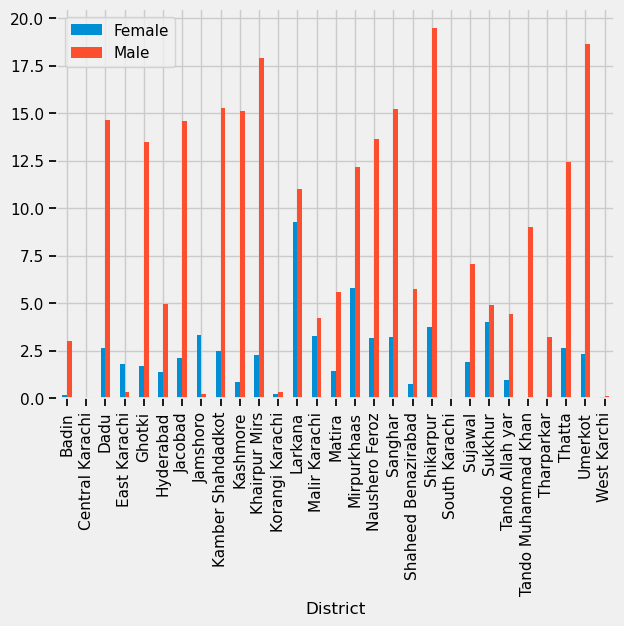

In [109]:

##teaching staff discrepancies amongst districts and rural urban
female_rural_teachers_HS = pivot[pivot.columns[0]]
male_rural_teachers_HS =  pivot[pivot.columns[8]]

rural_teachers = pd.DataFrame({ 'Female' : female_rural_teachers_HS , 'Male' : male_rural_teachers_HS})
rural_teachers.plot.bar()


In [94]:
rural_teachers

,Female,Male
District,,
Badin,0.166250,2.992492
Central Karachi,0.000000,0.000000
Dadu,2.644707,14.642648
East Karachi,1.788498,0.343942
Ghotki,1.700765,13.484637
Hyderabad,1.363969,4.955755
Jacobad,2.086859,14.608013
Jamshoro,3.322788,0.201381
Kamber Shahdadkot,2.460773,15.286620


### ENROllment rates (gender based)

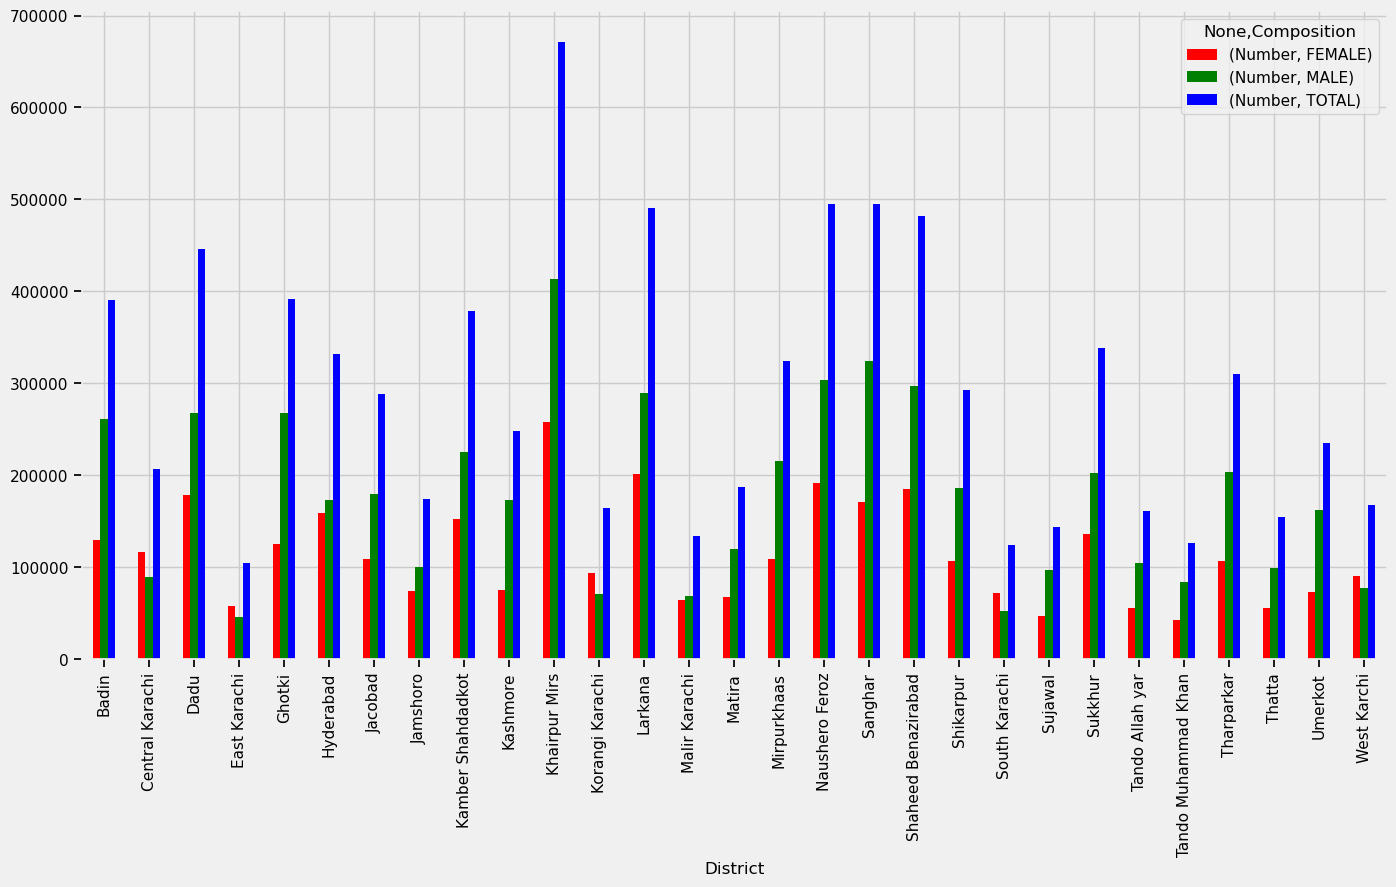

In [113]:
enrollment_info= sindhdata_enrollment[sindhdata_enrollment["Category"]=="ENROLMENT"]
enrollment_info=enrollment_info.drop(["No/100000"], axis=1)
enrollmentPlot= enrollment_info.groupby(["District","Composition"]).sum().unstack().plot(kind='bar', legend=True, color=['red', 'green', 'blue'], figsize=(15,8))


### Teaching Staff(Based on gender)

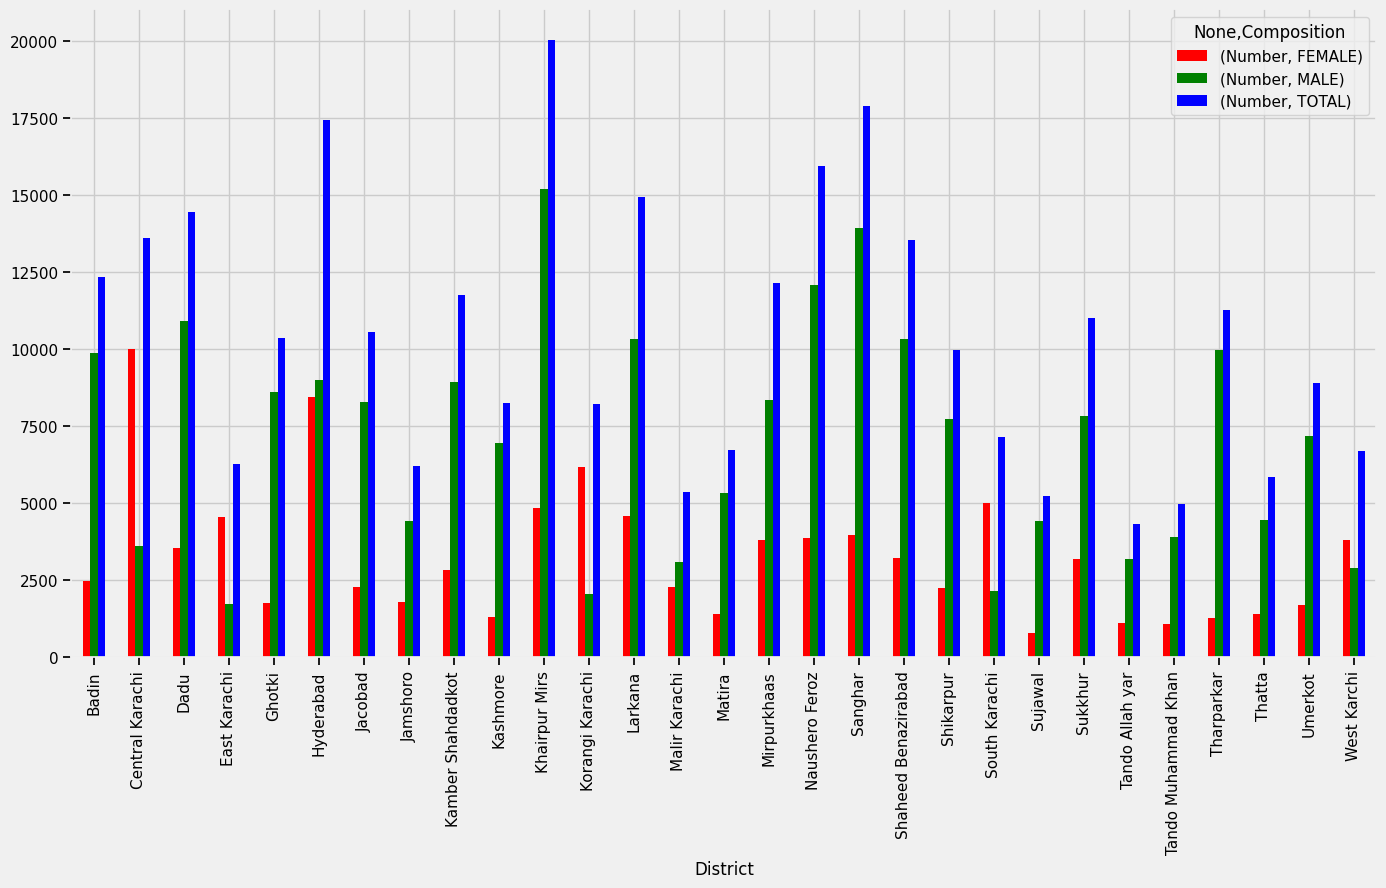

In [113]:
enrollment_info= sindhdata_enrollment[sindhdata_enrollment["Category"]=="TEACHING STAFF"]
enrollment_info=enrollment_info.drop(["No/100000"], axis=1)
teachingPlot= enrollment_info.groupby(["District","Composition"]).sum().unstack().plot(kind='bar', legend=True, color=['red', 'green', 'blue'], figsize=(15,8))

In [175]:
data

,District,Location,School Type,Category,Composition,Number,Population,No/100000
0,Badin,Urban,Primary,INSTITUTIONS,TOTAL,168,"1,804,516",9.309976
1,Badin,Urban,Primary,INSTITUTIONS,MALE,30,"1,804,516",1.662496
2,Badin,Urban,Primary,INSTITUTIONS,FEMALE,27,"1,804,516",1.496246
3,Badin,Urban,Primary,INSTITUTIONS,MIXED,111,"1,804,516",6.151234
4,Badin,Urban,Primary,ENROLMENT,TOTAL,16446,"1,804,516",911.380115
...,...,...,...,...,...,...,...,...
3475,Shaheed Benazirabad,Total,Higher secondary,ENROLMENT,MALE,11440,"1,612,847",709.304726
3476,Shaheed Benazirabad,Total,Higher secondary,ENROLMENT,FEMALE,6467,"1,612,847",400.967978
3477,Shaheed Benazirabad,Total,Higher secondary,TEACHING STAFF,TOTAL,367,"1,612,847",22.754793
3478,Shaheed Benazirabad,Total,Higher secondary,TEACHING STAFF,MALE,276,"1,612,847",17.112597


In [176]:
city_groups = {'Central Karachi' : 'Karachi', 'East Karachi' : 'Karachi', 'Korangi Karachi' : 'Karachi', 'Malir Karachi' : 'Karachi', 'South Karachi' : 'Karachi', 'West Karchi' : 'Karachi',
               'Badin': 'Badin',
               'Dadu': 'Dadu',
               'Ghotki': 'Ghotki',
               'Hyderabad': 'Hyderabad',
               'Jacobabad': 'Jacobabad',
               'Jamshoro': 'Jamshoro',
               'Kamber Shahdadkot': 'Kamber Shahdadkot',
               'Kashmore': 'Kashmore',
               'Khairpur Mirs': 'Khairpur Mirs',
               'Larkana': 'Larkana',
               'Matira': 'Matira',
               'Mirpurkhaas': 'Mirpurkhaas',
               'Naushero Feroze': 'Naushero Feroze',
               'Sanghar': 'Sanghar',
               'Shaheed Benazirabad': 'Shaheed Benazirabad',
               'Shikarpur': 'Shikarpur',
               'Sujawal': 'Sujawal',
               'Sukkhur': 'Sukkhur',
               'Tando Allah yar': 'Tando Allah yar',
               'Tando Muhammad Khan': 'Tando Muhammad Khan',
               'Tharparkar': 'Tharparkar',
               'Thatta': 'Thatta',
               'Umerkot': 'Umerkot',
               }

data['District'] = data['District'].replace(city_groups)

In [177]:
data['District'].unique()

array(['Badin', 'Dadu', 'Hyderabad', 'Thatta', 'Jamshoro', 'Matira',
       'Tando Allah yar', 'Tando Muhammad Khan', 'Sujawal', 'Karachi',
       'Jacobad', 'Larkana', 'Shikarpur', 'Kashmore', 'Kamber Shahdadkot',
       'Khairpur Mirs', 'Sukkhur', 'Ghotki', 'Mirpurkhaas', 'Tharparkar',
       'Umerkot', 'Sanghar', 'Naushero Feroz', 'Shaheed Benazirabad'],
      dtype=object)

In [178]:
df2 = data.groupby(['District', 'Composition', 'Category'])['Number'].sum()

In [179]:
df2

District  Composition  Category      
Badin     FEMALE       ENROLMENT         129104
                       INSTITUTIONS         612
                       TEACHING STAFF      2464
          MALE         ENROLMENT         261148
                       INSTITUTIONS         924
                                          ...  
Umerkot   MALE         TEACHING STAFF      7194
          MIXED        INSTITUTIONS        2634
          TOTAL        ENROLMENT         234930
                       INSTITUTIONS        4056
                       TEACHING STAFF      8906
Name: Number, Length: 240, dtype: int64

In [180]:
df2.columns = ['District', 'Composition', 'Category' ,'Number']

In [181]:
df2

District  Composition  Category      
Badin     FEMALE       ENROLMENT         129104
                       INSTITUTIONS         612
                       TEACHING STAFF      2464
          MALE         ENROLMENT         261148
                       INSTITUTIONS         924
                                          ...  
Umerkot   MALE         TEACHING STAFF      7194
          MIXED        INSTITUTIONS        2634
          TOTAL        ENROLMENT         234930
                       INSTITUTIONS        4056
                       TEACHING STAFF      8906
Name: Number, Length: 240, dtype: int64

In [182]:
df2 = df2.unstack()
df2 = df2.unstack()

In [183]:
df2

Category            ENROLMENT                           INSTITUTIONS          \
Composition            FEMALE      MALE MIXED     TOTAL       FEMALE    MALE   
District                                                                       
Badin                129104.0  261148.0   NaN  390252.0        612.0   924.0   
Dadu                 178028.0  267800.0   NaN  445828.0        562.0   526.0   
Ghotki               124910.0  267186.0   NaN  392096.0        396.0   490.0   
Hyderabad            158756.0  173544.0   NaN  332300.0        320.0   266.0   
Jacobad              108922.0  179772.0   NaN  288694.0        430.0   502.0   
Jamshoro              74076.0  100578.0   NaN  174654.0        174.0   118.0   
Kamber Shahdadkot    152724.0  225584.0   NaN  378308.0        430.0   372.0   
Karachi              496290.0  404536.0   NaN  900826.0       1200.0  1198.0   
Kashmore              75052.0  172746.0   NaN  247798.0        338.0   368.0   
Khairpur Mirs        258172.0  413044.0   NaN  671216.0        816.0   616.0   
Larkana              201606.0  289374.0   NaN  490980.0        342.0   322.0   
Matira                67120.0  120124.0   NaN  187244.0        156.0   134.0   
Mirpurkhaas          109126.0  215610.0   NaN  324736.0        516.0   546.0   
Naushero Feroz       191114.0  303722.0   NaN  494836.0        440.0   302.0   
Sanghar              170508.0  324402.0   NaN  494910.0        548.0   762.0   
Shaheed Benazirabad  184736.0  297598.0   NaN  482334.0        624.0   668.0   
Shikarpur            106256.0  186030.0   NaN  292286.0        256.0   326.0   
Sujawal               47196.0   96870.0   NaN  144066.0        246.0   726.0   
Sukkhur              136292.0  202172.0   NaN  338464.0        290.0   280.0   
Tando Allah yar       56142.0  104550.0   NaN  160692.0        182.0   196.0   
Tando Muhammad Khan   42482.0   83960.0   NaN  126442.0        232.0   388.0   
Tharparkar           106702.0  203056.0   NaN  309758.0        758.0   764.0   
Thatta                55718.0   98888.0   NaN  154606.0        310.0   516.0   
Umerkot               73018.0  161912.0   NaN  234930.0        592.0   830.0   

Category                            TEACHING STAFF                          
Composition           MIXED   TOTAL         FEMALE     MALE MIXED    TOTAL  
District                                                                    
Badin                4332.0  5868.0         2464.0   9888.0   NaN  12352.0  
Dadu                 2554.0  3642.0         3532.0  10930.0   NaN  14462.0  
Ghotki               2896.0  3782.0         1754.0   8624.0   NaN  10378.0  
Hyderabad            1150.0  1736.0         8438.0   9002.0   NaN  17440.0  
Jacobad              1922.0  2854.0         2276.0   8286.0   NaN  10562.0  
Jamshoro             1096.0  1388.0         1798.0   4416.0   NaN   6214.0  
Kamber Shahdadkot    2194.0  2996.0         2836.0   8934.0   NaN  11770.0  
Karachi              3316.0  5714.0        31804.0  15520.0   NaN  47324.0  
Kashmore             2030.0  2736.0         1308.0   6956.0   NaN   8264.0  
Khairpur Mirs        5148.0  6580.0         4832.0  15204.0   NaN  20036.0  
Larkana              1652.0  2316.0         4588.0  10346.0   NaN  14934.0  
Matira               1368.0  1658.0         1392.0   5322.0   NaN   6714.0  
Mirpurkhaas          2934.0  3996.0         3806.0   8346.0   NaN  12152.0  
Naushero Feroz       3728.0  4470.0         3874.0  12080.0   NaN  15954.0  
Sanghar              4600.0  5910.0         3970.0  13930.0   NaN  17900.0  
Shaheed Benazirabad  3430.0  4722.0         3218.0  10342.0   NaN  13560.0  
Shikarpur            1620.0  2202.0         2242.0   7736.0   NaN   9978.0  
Sujawal              1808.0  2780.0          802.0   4434.0   NaN   5236.0  
Sukkhur              1804.0  2374.0         3186.0   7828.0   NaN  11014.0  
Tando Allah yar      1142.0  1520.0         1120.0   3202.0   NaN   4322.0  
Tando Muhammad Khan  1404.0  2024.0         1074.0   3910.0   NaN   

In [184]:
df2_big = df2.copy()

In [171]:
df2.columns

MultiIndex([(     'ENROLMENT', 'FEMALE'),
            (     'ENROLMENT',   'MALE'),
            (     'ENROLMENT',  'MIXED'),
            (     'ENROLMENT',  'TOTAL'),
            (  'INSTITUTIONS', 'FEMALE'),
            (  'INSTITUTIONS',   'MALE'),
            (  'INSTITUTIONS',  'MIXED'),
            (  'INSTITUTIONS',  'TOTAL'),
            ('TEACHING STAFF', 'FEMALE'),
            ('TEACHING STAFF',   'MALE'),
            ('TEACHING STAFF',  'MIXED'),
            ('TEACHING STAFF',  'TOTAL')],
           names=['Category', 'Composition'])

In [185]:
df2_big.columns

MultiIndex([(     'ENROLMENT', 'FEMALE'),
            (     'ENROLMENT',   'MALE'),
            (     'ENROLMENT',  'MIXED'),
            (     'ENROLMENT',  'TOTAL'),
            (  'INSTITUTIONS', 'FEMALE'),
            (  'INSTITUTIONS',   'MALE'),
            (  'INSTITUTIONS',  'MIXED'),
            (  'INSTITUTIONS',  'TOTAL'),
            ('TEACHING STAFF', 'FEMALE'),
            ('TEACHING STAFF',   'MALE'),
            ('TEACHING STAFF',  'MIXED'),
            ('TEACHING STAFF',  'TOTAL')],
           names=['Category', 'Composition'])

In [172]:
df2.drop([('ENROLMENT', 'MIXED'), (     'ENROLMENT',  'TOTAL'), (  'INSTITUTIONS',  'MIXED'), (  'INSTITUTIONS',  'TOTAL'), ('TEACHING STAFF', 'FEMALE'),
            ('TEACHING STAFF',   'MALE'),
            ('TEACHING STAFF',  'MIXED'),
            ('TEACHING STAFF',  'TOTAL')], axis = 1, inplace = True)

In [186]:
df2_big.drop([('ENROLMENT', 'MALE'), ('ENROLMENT', 'MIXED'), (     'ENROLMENT',  'TOTAL'), ('INSTITUTIONS',  'FEMALE'), ('INSTITUTIONS',  'MALE'), (  'INSTITUTIONS',  'MIXED'), (  'INSTITUTIONS',  'TOTAL'),
            ('TEACHING STAFF',   'MALE'),
            ('TEACHING STAFF',  'MIXED'),
            ('TEACHING STAFF',  'TOTAL')], axis = 1, inplace = True)

In [173]:
df2

Category            ENROLMENT           INSTITUTIONS        
Composition            FEMALE      MALE       FEMALE    MALE
District                                                    
Badin                129104.0  261148.0        612.0   924.0
Dadu                 178028.0  267800.0        562.0   526.0
Ghotki               124910.0  267186.0        396.0   490.0
Hyderabad            158756.0  173544.0        320.0   266.0
Jacobad              108922.0  179772.0        430.0   502.0
Jamshoro              74076.0  100578.0        174.0   118.0
Kamber Shahdadkot    152724.0  225584.0        430.0   372.0
Karachi              496290.0  404536.0       1200.0  1198.0
Kashmore              75052.0  172746.0        338.0   368.0
Khairpur Mirs        258172.0  413044.0        816.0   616.0
Larkana              201606.0  289374.0        342.0   322.0
Matira                67120.0  120124.0        156.0   134.0
Mirpurkhaas          109126.0  215610.0        516.0   546.0
Naushero Feroz       191114.0  303722.0        440.0   302.0
Sanghar              170508.0  324402.0        548.0   762.0
Shaheed Benazirabad  184736.0  297598.0        624.0   668.0
Shikarpur            106256.0  186030.0        256.0   326.0
Sujawal               47196.0   96870.0        246.0   726.0
Sukkhur              136292.0  202172.0        290.0   280.0
Tando Allah yar       56142.0  104550.0        182.0   196.0
Tando Muhammad Khan   42482.0   83960.0        232.0   388.0
Tharparkar           106702.0  203056.0        758.0   764.0
Thatta                55718.0   98888.0        310.0   516.0
Umerkot               73018.0  161912.0        592.0   830.0

In [187]:
df2_big

Category,ENROLMENT,TEACHING STAFF
Composition,FEMALE,FEMALE
District,,
Badin,129104.0,2464.0
Dadu,178028.0,3532.0
Ghotki,124910.0,1754.0
Hyderabad,158756.0,8438.0
Jacobad,108922.0,2276.0
Jamshoro,74076.0,1798.0
Kamber Shahdadkot,152724.0,2836.0
Karachi,496290.0,31804.0


In [188]:
enrolment_female = df2_big[('ENROLMENT', 'FEMALE')]
teaching_female = df2_big[('TEACHING STAFF', 'FEMALE')]

In [107]:
df2['Percentage of Females'] =  (df2[('ENROLMENT', 'FEMALE')]/((df2[('ENROLMENT', 'FEMALE')] + df2[(     'ENROLMENT', 'MALE')]))) * 100

In [108]:
df2

Category            ENROLMENT           INSTITUTIONS          \
Composition            FEMALE      MALE       FEMALE    MALE   
District                                                       
Badin                129104.0  261148.0        612.0   924.0   
Dadu                 178028.0  267800.0        562.0   526.0   
Ghotki               124910.0  267186.0        396.0   490.0   
Hyderabad            158756.0  173544.0        320.0   266.0   
Jacobad              108922.0  179772.0        430.0   502.0   
Jamshoro              74076.0  100578.0        174.0   118.0   
Kamber Shahdadkot    152724.0  225584.0        430.0   372.0   
Karachi              496290.0  404536.0       1200.0  1198.0   
Kashmore              75052.0  172746.0        338.0   368.0   
Khairpur Mirs        258172.0  413044.0        816.0   616.0   
Larkana              201606.0  289374.0        342.0   322.0   
Matira                67120.0  120124.0        156.0   134.0   
Mirpurkhaas          109126.0  215610.0        516.0   546.0   
Naushero Feroz       191114.0  303722.0        440.0   302.0   
Sanghar              170508.0  324402.0        548.0   762.0   
Shaheed Benazirabad  184736.0  297598.0        624.0   668.0   
Shikarpur            106256.0  186030.0        256.0   326.0   
Sujawal               47196.0   96870.0        246.0   726.0   
Sukkhur              136292.0  202172.0        290.0   280.0   
Tando Allah yar       56142.0  104550.0        182.0   196.0   
Tando Muhammad Khan   42482.0   83960.0        232.0   388.0   
Tharparkar           106702.0  203056.0        758.0   764.0   
Thatta                55718.0   98888.0        310.0   516.0   
Umerkot               73018.0  161912.0        592.0   830.0   

Category            Percentage of Females to Males  
Composition                                         
District                                            
Badin                                    33.082214  
Dadu                                     39.931992  
Ghotki                                   31.856994  
Hyderabad                                47.774902  
Jacobad                                  37.729222  
Jamshoro                                 42.412999  
Kamber Shahdadkot                        40.370280  
Karachi                                  55.092770  
Kashmore                                 30.287573  
Khairpur Mirs                            38.463326  
Larkana                                  41.061958  
Matira                                   35.846275  
Mirpurkhaas                              33.604528  
Naushero Feroz                           38.621685  
Sanghar                                  34.452325  
Shaheed Benazirabad                      38.300431  
Shikarpur                                36.353435  
Sujawal                                  32.759985  
Sukkhur                                  40.267798  
Tando Allah yar                          34.937645  
Tando Muhammad Khan                      33.598013  
Tharparkar                               34.446891  
Thatta                                   36.038705  
Umerkot                                  31.080747

In [110]:
df2.columns

MultiIndex([(                     'ENROLMENT', 'FEMALE'),
            (                     'ENROLMENT',   'MALE'),
            (                  'INSTITUTIONS', 'FEMALE'),
            (                  'INSTITUTIONS',   'MALE'),
            ('Percentage of Females to Males',       '')],
           names=['Category', 'Composition'])

In [113]:
df = df2.reset_index()

In [118]:
df = df.reset_index()

In [119]:
df

Category    index             District ENROLMENT           INSTITUTIONS  \
Composition                               FEMALE      MALE       FEMALE   
0               0                Badin  129104.0  261148.0        612.0   
1               1                 Dadu  178028.0  267800.0        562.0   
2               2               Ghotki  124910.0  267186.0        396.0   
3               3            Hyderabad  158756.0  173544.0        320.0   
4               4              Jacobad  108922.0  179772.0        430.0   
5               5             Jamshoro   74076.0  100578.0        174.0   
6               6    Kamber Shahdadkot  152724.0  225584.0        430.0   
7               7              Karachi  496290.0  404536.0       1200.0   
8               8             Kashmore   75052.0  172746.0        338.0   
9               9        Khairpur Mirs  258172.0  413044.0        816.0   
10             10              Larkana  201606.0  289374.0        342.0   
11             11               Matira   67120.0  120124.0        156.0   
12             12          Mirpurkhaas  109126.0  215610.0        516.0   
13             13       Naushero Feroz  191114.0  303722.0        440.0   
14             14              Sanghar  170508.0  324402.0        548.0   
15             15  Shaheed Benazirabad  184736.0  297598.0        624.0   
16             16            Shikarpur  106256.0  186030.0        256.0   
17             17              Sujawal   47196.0   96870.0        246.0   
18             18              Sukkhur  136292.0  202172.0        290.0   
19             19      Tando Allah yar   56142.0  104550.0        182.0   
20             20  Tando Muhammad Khan   42482.0   83960.0        232.0   
21             21           Tharparkar  106702.0  203056.0        758.0   
22             22               Thatta   55718.0   98888.0        310.0   
23             23              Umerkot   73018.0  161912.0        592.0   

Category            Percentage of Females to Males  
Composition    MALE                                 
0             924.0                      33.082214  
1             526.0                      39.931992  
2             490.0                      31.856994  
3             266.0                      47.774902  
4             502.0                      37.729222  
5             118.0                      42.412999  
6             372.0                      40.370280  
7            1198.0                      55.092770  
8             368.0                      30.287573  
9             616.0                      38.463326  
10            322.0                      41.061958  
11            134.0                      35.846275  
12            546.0                      33.604528  
13            302.0                      38.621685  
14            762.0                      34.452325  
15            668.0                      38.300431  
16            326.0                      36.353435  
17            726.0                      32.759985  
18            280.0                      40.267798  
19            196.0                      34.937645  
20            388.0                      33.598013  
21            764.0                      34.446891  
22            516.0                      36.038705  
23            830.0                      31.080747

In [115]:
df.columns

MultiIndex([(                      'District',       ''),
            (                     'ENROLMENT', 'FEMALE'),
            (                     'ENROLMENT',   'MALE'),
            (                  'INSTITUTIONS', 'FEMALE'),
            (                  'INSTITUTIONS',   'MALE'),
            ('Percentage of Females to Males',       '')],
           names=['Category', 'Composition'])

In [127]:
districts = df['District']

In [125]:
percent_female = df['Percentage of Females to Males']

In [129]:
print(len(percent_female))

24


In [128]:
districts

0                   Badin
1                    Dadu
2                  Ghotki
3               Hyderabad
4                 Jacobad
5                Jamshoro
6       Kamber Shahdadkot
7                 Karachi
8                Kashmore
9           Khairpur Mirs
10                Larkana
11                 Matira
12            Mirpurkhaas
13         Naushero Feroz
14                Sanghar
15    Shaheed Benazirabad
16              Shikarpur
17                Sujawal
18                Sukkhur
19        Tando Allah yar
20    Tando Muhammad Khan
21             Tharparkar
22                 Thatta
23                Umerkot
Name: District, dtype: object

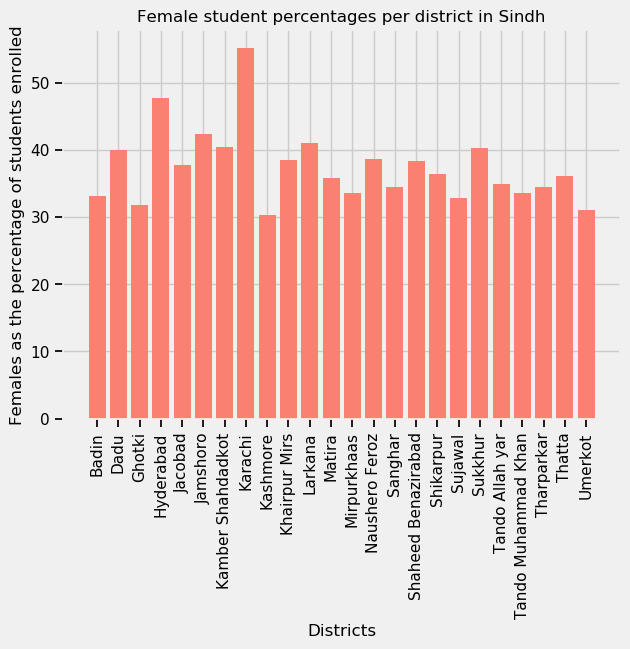

In [193]:
plt.bar(districts, percent_female, color='#FA8072')
plt.xticks(rotation=90)
plt.xlabel('Districts')
plt.ylabel("Females as the percentage of students enrolled")
plt.title("Female student percentages per district in Sindh")
plt.show()

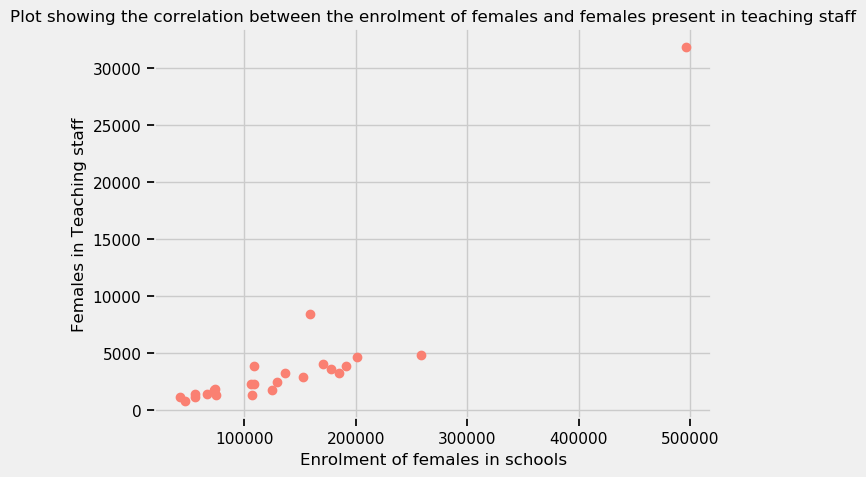

In [194]:
plt.scatter(enrolment_female, teaching_female, color="#FA8072")
plt.xlabel("Enrolment of females in schools")
plt.ylabel("Females in Teaching staff")
plt.title("Plot showing the correlation between the enrolment of females and females present in teaching staff")
plt.show()